In [34]:
!pip install mlxtend
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

In [35]:
df = pd.read_csv("palmer_penguins.csv")
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...,...
339,339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [119]:
y = df.iloc[0:220].drop(index=4).species.values
y = np.where(y == 'Adelie', -1, 1)
X = df[["bill_length_mm", "bill_depth_mm"]].iloc[:220].drop(index=3).values

In [76]:
class Perceptron(object):
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])

        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi
                self.w_[-1] = update
                errors += int(update != 0)
            self.errors_.append(errors)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        

In [120]:
percep = Perceptron(epochs = 1_500)
percep.train(X, y)

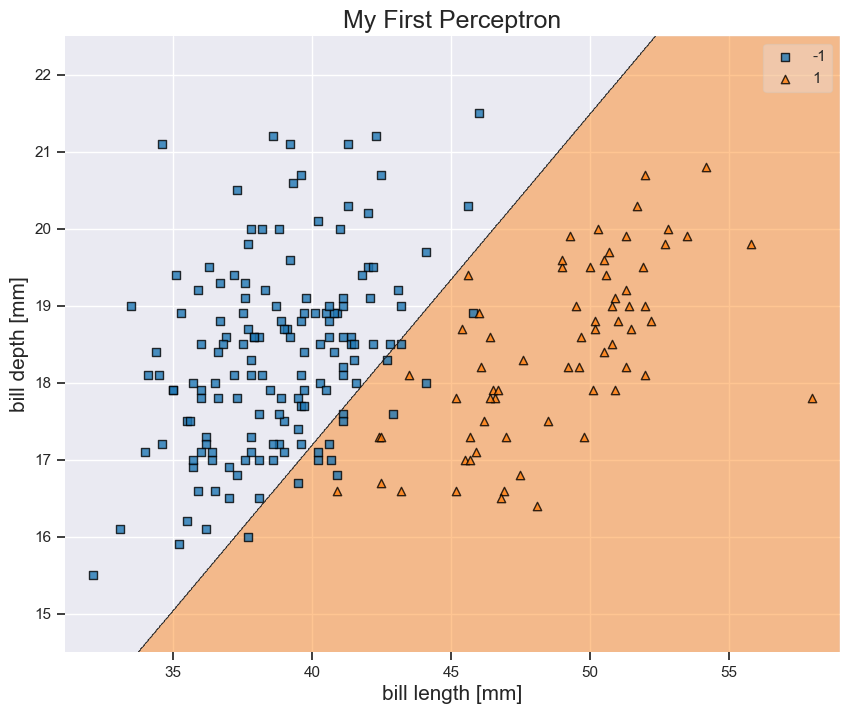

In [121]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = percep)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.show()

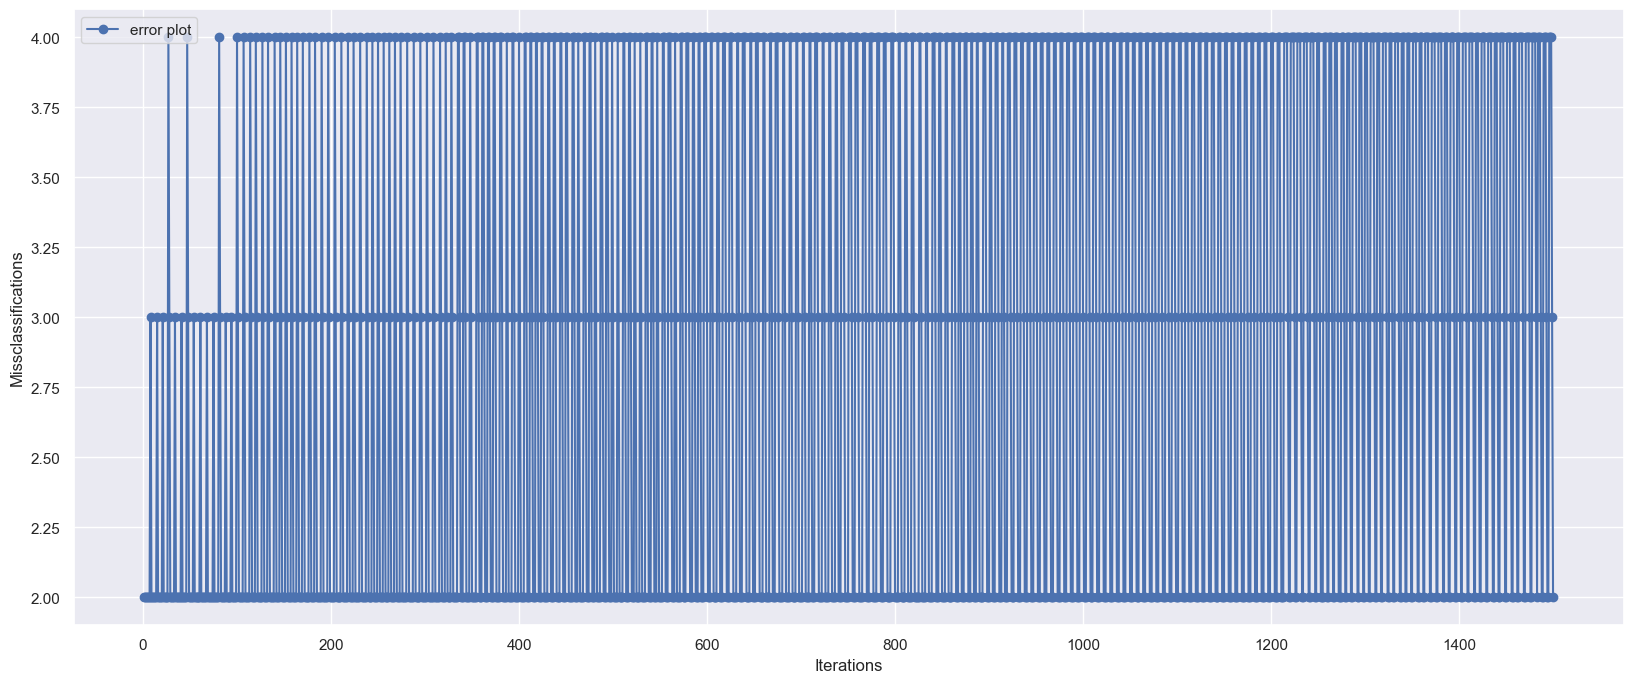

In [122]:
plt.figure(figsize = (20, 8))
plt.plot(range(1,len(percep.errors_)+1), percep.errors_,
              marker = "o",
              label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()

Notes:
- used 1500 epochs instead of 1000
- tried various other combinations of attributes and they were even less linearly separable than bill length and bill depth
- the plot of the error shows no clear signs of tending downward, towards less errors. maybe indicates that many more epochs are needed or that bill length and bill depth are not linearly separable.
